In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Importing

In [2]:
df=pd.read_csv("C:\\Users\\bikki\\Downloads\\Spam_SMS.csv")

In [3]:
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.isnull().sum()

Class      0
Message    0
dtype: int64

### 2. Text Preprocessing

#### 1.	Lowercasing

In [8]:
# Step 1: Lowercasing the Message column
df['Lowercased_Message'] = df['Message'].str.lower()

# Display a few original vs lowercased messages
print(df[['Message', 'Lowercased_Message']].head(10))

                                             Message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   
5  FreeMsg Hey there darling it's been 3 week's n...   
6  Even my brother is not like to speak with me. ...   
7  As per your request 'Melle Melle (Oru Minnamin...   
8  WINNER!! As a valued network customer you have...   
9  Had your mobile 11 months or more? U R entitle...   

                                  Lowercased_Message  
0  go until jurong point, crazy.. available only ...  
1                      ok lar... joking wif u oni...  
2  free entry in 2 a wkly comp to win fa cup fina...  
3  u dun say so early hor... u c already then say...  
4  nah i don't think he goes to usf, he lives aro...  
5  freemsg hey there darling it's been 3 week's n... 

#### 2.	Remove Punctuations and Special Characters

In [9]:
import re

In [10]:
# Step 2: Remove punctuations and special characters
def remove_special_chars(text):
    return re.sub(r'[^a-z\s]', '', text)

df['Cleaned_Message'] = df['Lowercased_Message'].apply(remove_special_chars)

# Display a few cleaned messages
print(df[[ 'Lowercased_Message', 'Cleaned_Message']].head(10))

                                  Lowercased_Message  \
0  go until jurong point, crazy.. available only ...   
1                      ok lar... joking wif u oni...   
2  free entry in 2 a wkly comp to win fa cup fina...   
3  u dun say so early hor... u c already then say...   
4  nah i don't think he goes to usf, he lives aro...   
5  freemsg hey there darling it's been 3 week's n...   
6  even my brother is not like to speak with me. ...   
7  as per your request 'melle melle (oru minnamin...   
8  winner!! as a valued network customer you have...   
9  had your mobile 11 months or more? u r entitle...   

                                     Cleaned_Message  
0  go until jurong point crazy available only in ...  
1                            ok lar joking wif u oni  
2  free entry in  a wkly comp to win fa cup final...  
3        u dun say so early hor u c already then say  
4  nah i dont think he goes to usf he lives aroun...  
5  freemsg hey there darling its been  weeks now ... 

#### 3.	Stop Word Removal: 

In [76]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

In [11]:
df['No_Punct_Message'] = df['Lowercased_Message'].apply(remove_special_chars)

# Step 3: Remove stop words (using a basic custom list)
basic_stopwords = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'you', 'your', 'yours',
    'he', 'him', 'his', 'she', 'her', 'hers', 'it', 'its', 'they', 'them',
    'their', 'what', 'which', 'who', 'whom', 'this', 'that', 'am', 'is', 'are',
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'do', 'does',
    'did', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
    'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through',
    'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then',
    'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',
    'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no',
    'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 'and', 'the'
}

def remove_stopwords(text):
    tokens = text.split()
    filtered = [word for word in tokens if word not in basic_stopwords]
    return ' '.join(filtered)

df['No_Stopwords_Message'] = df['No_Punct_Message'].apply(remove_stopwords)

# Display a few examples
print(df[[ 'Lowercased_Message', 'No_Punct_Message', 'No_Stopwords_Message']].head(10))


                                  Lowercased_Message  \
0  go until jurong point, crazy.. available only ...   
1                      ok lar... joking wif u oni...   
2  free entry in 2 a wkly comp to win fa cup fina...   
3  u dun say so early hor... u c already then say...   
4  nah i don't think he goes to usf, he lives aro...   
5  freemsg hey there darling it's been 3 week's n...   
6  even my brother is not like to speak with me. ...   
7  as per your request 'melle melle (oru minnamin...   
8  winner!! as a valued network customer you have...   
9  had your mobile 11 months or more? u r entitle...   

                                    No_Punct_Message  \
0  go until jurong point crazy available only in ...   
1                            ok lar joking wif u oni   
2  free entry in  a wkly comp to win fa cup final...   
3        u dun say so early hor u c already then say   
4  nah i dont think he goes to usf he lives aroun...   
5  freemsg hey there darling its been  weeks no

#### 4.	Tokenization: 

In [12]:
df['Tokenized_Message'] = df['No_Stopwords_Message'].apply(lambda x: x.split())
# Show final tokenized output
print(df[['No_Stopwords_Message','Tokenized_Message']].head())


                                No_Stopwords_Message  \
0  go jurong point crazy available bugis n great ...   
1                            ok lar joking wif u oni   
2  free entry a wkly comp win fa cup final tkts s...   
3                u dun say early hor u c already say   
4        nah dont think goes usf lives around though   

                                   Tokenized_Message  
0  [go, jurong, point, crazy, available, bugis, n...  
1                     [ok, lar, joking, wif, u, oni]  
2  [free, entry, a, wkly, comp, win, fa, cup, fin...  
3      [u, dun, say, early, hor, u, c, already, say]  
4  [nah, dont, think, goes, usf, lives, around, t...  


#### 5.	Lemmatization:

In [13]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [14]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bikki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bikki\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bikki\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
lemmatizer = WordNetLemmatizer()
# Apply lemmatization on tokenized words
df['Lemmatized_Message']=df['Tokenized_Message'].apply(
    lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

In [16]:
df['Final_Cleaned_Text'] = df['Lemmatized_Message'].apply(lambda x: ' '.join(x))

# Show results
print(df[['Message', 'Final_Cleaned_Text']].head(10))

                                             Message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   
5  FreeMsg Hey there darling it's been 3 week's n...   
6  Even my brother is not like to speak with me. ...   
7  As per your request 'Melle Melle (Oru Minnamin...   
8  WINNER!! As a valued network customer you have...   
9  Had your mobile 11 months or more? U R entitle...   

                                  Final_Cleaned_Text  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry a wkly comp win fa cup final tkts s...  
3                u dun say early hor u c already say  
4           nah dont think go usf life around though  
5  freemsg hey darling week now word back id like... 

### 3. Feature Extraction

#### 1.	Bag of Words (BoW): 

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
vectorizer=CountVectorizer()

In [19]:
# Transform text to feature vectors
x_bow=vectorizer.fit_transform(df['Final_Cleaned_Text'])

# Convert to DataFrame for visualization
bow_df=pd.DataFrame(x_bow.toarray(),columns=vectorizer.get_feature_names_out())

# Show a sample
print(bow_df.head())

   aa  aah  aaniye  aaooooright  aathilove  aathiwhere  ab  abbey  abdomen  \
0   0    0       0            0          0           0   0      0        0   
1   0    0       0            0          0           0   0      0        0   
2   0    0       0            0          0           0   0      0        0   
3   0    0       0            0          0           0   0      0        0   
4   0    0       0            0          0           0   0      0        0   

   abeg  ...  zed  zero  zf  zhong  zindgi  zoe  zogtorius  zoom  zouk  zyada  
0     0  ...    0     0   0      0       0    0          0     0     0      0  
1     0  ...    0     0   0      0       0    0          0     0     0      0  
2     0  ...    0     0   0      0       0    0          0     0     0      0  
3     0  ...    0     0   0      0       0    0          0     0     0      0  
4     0  ...    0     0   0      0       0    0          0     0     0      0  

[5 rows x 7970 columns]


#### 2.	(Optional) TF-IDF: 

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tf_vc=TfidfVectorizer()


# Transform text to TF-IDF features
x_tf = tf_vc.fit_transform(df['Final_Cleaned_Text'])

# Convert to DataFrame for visualization (optional)
tfidf_df = pd.DataFrame(x_tf.toarray(), columns=tf_vc.get_feature_names_out())

# Show a sample
print(tfidf_df.head())

    aa  aah  aaniye  aaooooright  aathilove  aathiwhere   ab  abbey  abdomen  \
0  0.0  0.0     0.0          0.0        0.0         0.0  0.0    0.0      0.0   
1  0.0  0.0     0.0          0.0        0.0         0.0  0.0    0.0      0.0   
2  0.0  0.0     0.0          0.0        0.0         0.0  0.0    0.0      0.0   
3  0.0  0.0     0.0          0.0        0.0         0.0  0.0    0.0      0.0   
4  0.0  0.0     0.0          0.0        0.0         0.0  0.0    0.0      0.0   

   abeg  ...  zed  zero   zf  zhong  zindgi  zoe  zogtorius  zoom  zouk  zyada  
0   0.0  ...  0.0   0.0  0.0    0.0     0.0  0.0        0.0   0.0   0.0    0.0  
1   0.0  ...  0.0   0.0  0.0    0.0     0.0  0.0        0.0   0.0   0.0    0.0  
2   0.0  ...  0.0   0.0  0.0    0.0     0.0  0.0        0.0   0.0   0.0    0.0  
3   0.0  ...  0.0   0.0  0.0    0.0     0.0  0.0        0.0   0.0   0.0    0.0  
4   0.0  ...  0.0   0.0  0.0    0.0     0.0  0.0        0.0   0.0   0.0    0.0  

[5 rows x 7970 columns]


### 4. Model Training

#### Data Spliting

In [73]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [22]:
x= tf_vc.fit_transform(df['Final_Cleaned_Text'])
y = df['Class']  # Target labels: 'spam' or 'ham'

In [23]:
from sklearn.model_selection import train_test_split
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

#### Fitting Models

In [24]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [25]:
log_pred =  log_model.predict(x_test)

In [26]:
print("Accuracy:", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))

Accuracy: 0.9605381165919282
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       954
        spam       0.98      0.75      0.85       161

    accuracy                           0.96      1115
   macro avg       0.97      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115



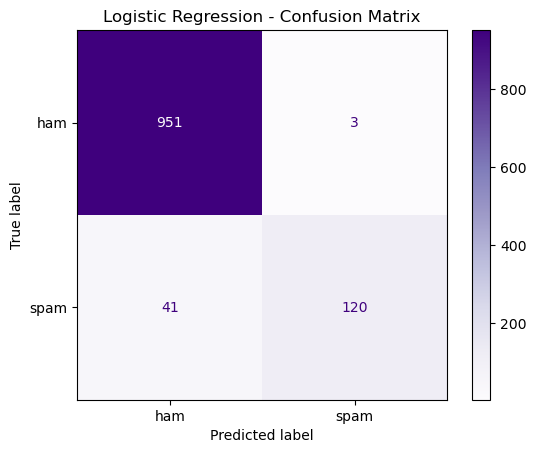

In [63]:
# Logistic Regression
log_cm = confusion_matrix(y_test, log_pred, labels=["ham", "spam"])
ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=["ham", "spam"]).plot(cmap='Purples')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

In [27]:
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

MultinomialNB()

In [28]:
nb_pred = nb_model.predict(x_test)

In [29]:
print("Accuracy:",accuracy_score(y_test, nb_pred))
print(classification_report(y_test,nb_pred))

Accuracy: 0.9650224215246637
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       954
        spam       1.00      0.76      0.86       161

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



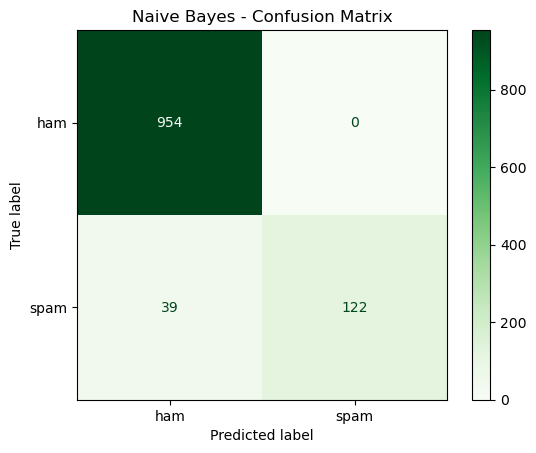

In [71]:
# Naive  bayes
rf_cm = confusion_matrix(y_test,nb_pred, labels=["ham", "spam"])
ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=["ham", "spam"]).plot(cmap='Greens')
plt.title("Naive Bayes - Confusion Matrix")
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [31]:
rf_pred = rf_model.predict(x_test)

In [32]:
print("Accuracy :" ,accuracy_score(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

Accuracy : 0.9739910313901345
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       954
        spam       0.99      0.83      0.90       161

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



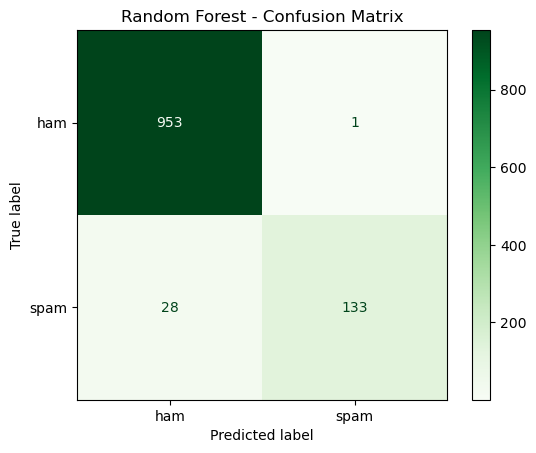

In [72]:
# Random Forest
rf_cm = confusion_matrix(y_test, rf_pred, labels=["ham", "spam"])
ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=["ham", "spam"]).plot(cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.show()

### 5. Prediction

In [35]:
#  Store predictions in a DataFrame for evaluation
results = pd.DataFrame({
    'Original_Message': df.loc[y_test.index, 'Message'],
    'Actual_Label': y_test.values,
    'NB_Predicted': nb_pred,
    'LogReg_Predicted': log_pred,
    'RF_Predicted': rf_pred
})

# Show first few predictions
print(results.tail(10))

                                       Original_Message Actual_Label  \
1703                  I have lost 10 kilos as of today!          ham   
3434  Christmas is An occasion that is Celebrated as...          ham   
4855  Also north carolina and texas atm, you would j...          ham   
2487         I dont thnk its a wrong calling between us          ham   
1726  You know there is. I shall speak to you in  &l...          ham   
2942  My supervisor find 4 me one lor i thk his stud...          ham   
4864  Bored housewives! Chat n date now! 0871750.77....         spam   
3227  Rose for red,red for blood,blood for heart,hea...          ham   
3796      Also remember the beads don't come off. Ever.          ham   
2879  Hey Boys. Want hot XXX pics sent direct 2 ur p...         spam   

     NB_Predicted LogReg_Predicted RF_Predicted  
1703          ham              ham          ham  
3434          ham              ham          ham  
4855          ham              ham          ham  
2487   

In [74]:
# Example new messages
new_messages = ["Congratulations! You won a free iPhone", "Let's meet at 5 pm today","Message me to win prize"]

# Clean using same pipeline
cleaned_new = [' '.join([word for word in re.sub(r'[^a-z\s]', '', msg.lower()).split() if word not in basic_stopwords]) for msg in new_messages]

# Convert to TF-IDF
new_features = tf_vc.transform(cleaned_new)  # We can use CountVectorizer or TfidfVectorizer

# Predict using trained model (e.g., Naive Bayes)
new_preds = nb_model.predict(new_features)

# Show results
for msg, label in zip(new_messages, new_preds):
    print(f"Message: {msg}\nPredicted: {label}\n")

Message: Congratulations! You won a free iPhone
Predicted: spam

Message: Let's meet at 5 pm today
Predicted: ham

Message: Message me to win prize
Predicted: spam



# Model Comparison and Analysis

## 1. Model Performance Overview

### Logistic Regression
- **Accuracy:** 0.96053  
- **Confusion Matrix:**  
  | Predicted | Actual Positive | Actual Negative |
  |-----------|-----------------|-----------------|
  | **Positive** | 951             | 3               |
  | **Negative** | 41             | 120               |

### Naive Bayes
- **Accuracy:** 0.96502  
- **Confusion Matrix:**  
  | Predicted | Actual Positive | Actual Negative |
  |-----------|-----------------|-----------------|
  | **Positive** | 954             | 0              |
  | **Negative** | 39              | 122             |

### Random Forest
- **Accuracy:** 0.97399  
- **Confusion Matrix:**  
  | Predicted | Actual Positive | Actual Negative |
  |-----------|-----------------|-----------------|
  | **Positive** | 953             | 1               |
  | **Negative** | 28              | 133              |

---

## 2. Observations

### Logistic Regression
- **Accuracy:** 96.05%
- **Confusion Matrix Analysis:**
  - True Positives: 951  
  - True Negatives: 120
  - False Positives: 3  
  - False Negatives: 41   
  - **No correct predictions for the negative class.**
- Indicates a strong bias toward predicting the positive class.

### Naive Bayes
- **Accuracy:** 96.5%
- **Confusion Matrix Analysis:**
  - True Positives: 954   
  - True Negatives: 122  
  - False Positives: 0  
  - False Negatives: 39  
- Performs better than Logistic Regression with improved predictions for both classes.

### Random Forest
- **Accuracy:** 97.39%
- **Confusion Matrix Analysis:**
  - True Positives: 953  
  - True Negatives: 133  
  - False Positives: 1  
  - False Negatives: 28  
- Shows the best accuracy among the three models, with a strong balance in predictions.

---


## 3. Final Conclusion
The **Random Forest model** is the most effective among the three, providing the highest accuracy and well-balanced predictions. It is recommended for deployment after additional validation and testing.
